In [105]:
# import opencv
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('images/sampel11.jpg')

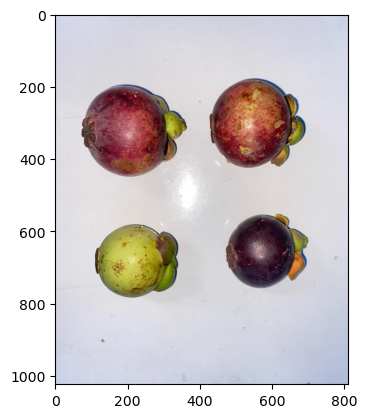

In [106]:
plt.imshow(img[:,:,[2,1,0]])
plt.show()

In [107]:
# Ubah citra ke grayscale
image_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

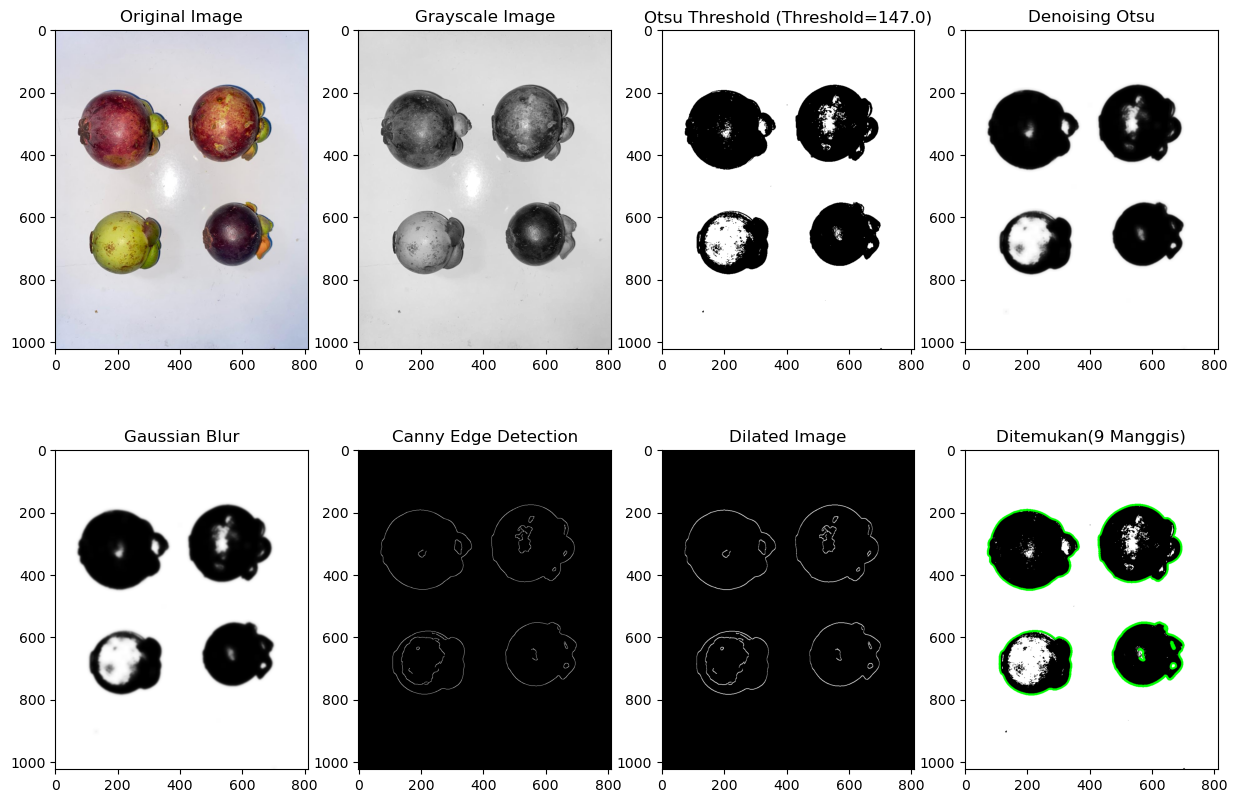

In [108]:
# Menentukan Otsu Treshold
otsu_threshold, image_otsu = cv2.threshold(
    image_gray, 120, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU
)

# img[image_otsu == 0] = (0, 0, 0)

# Denoising Otsu
image_otsu_clean = cv2.fastNlMeansDenoising(image_otsu, None,150, 7, 21)

# Gaussian Blur
blur = cv2.GaussianBlur(image_otsu_clean, (11, 11), 0)

# Deteksi Tepi - Canny
canny = cv2.Canny(blur, 30, 150, 3)

# Dilasi
dilated = cv2.dilate(canny, (1, 1), iterations=1)

# Count 
(cnt, hierarchy) = cv2.findContours(
dilated.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
rgb = cv2.cvtColor(image_otsu, cv2.COLOR_BGR2RGB)
data = cv2.drawContours(rgb, cnt, -1, (0, 255, 0), 5)

# Tampilkan semua langkah dalam prosesnya
plt.figure(figsize=(15, 10))
plt.subplot(2, 4, 1), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), plt.title('Original Image')
plt.subplot(2, 4, 2), plt.imshow(image_gray, cmap='gray'), plt.title('Grayscale Image')
plt.subplot(2, 4, 3), plt.imshow(image_otsu, cmap='gray'), plt.title(f'Otsu Threshold (Threshold={otsu_threshold})')
plt.subplot(2, 4, 4), plt.imshow(image_otsu_clean, cmap='gray'), plt.title('Denoising Otsu')
plt.subplot(2, 4, 5), plt.imshow(blur, cmap='gray'), plt.title('Gaussian Blur')
plt.subplot(2, 4, 6), plt.imshow(canny, cmap='gray'), plt.title('Canny Edge Detection')
plt.subplot(2, 4, 7), plt.imshow(dilated, cmap='gray'), plt.title('Dilated Image')
plt.subplot(2, 4, 8), plt.imshow(rgb), plt.title(f'Ditemukan({len(cnt)} Manggis)')
plt.show()

# Deteksi jumlah buah

In [42]:
len(cnt)

500

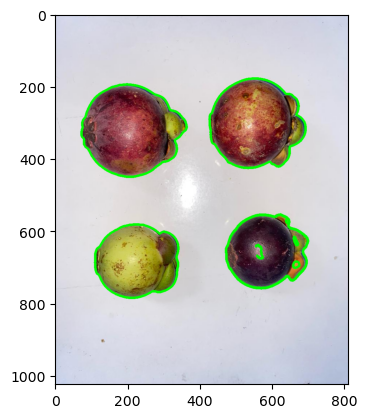

In [109]:
imgg = cv2.imread('images/sampel11.jpg')
rgbb = cv2.cvtColor(imgg, cv2.COLOR_BGR2RGB)
cv2.drawContours(rgbb, cnt, -1, (0, 255, 0), 5)

plt.imshow(rgbb)
plt.show()

# Fungsi deteksi Kematangan

In [110]:
def detect_maturity(img,i):
    # Konversi ke mode warna HSV
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    # Tentukan rentang warna untuk setiap tingkat kematangan
    
    # Matang
    lower_matang = np.array([0, 53, 53])
    upper_matang = np.array([179, 255, 90])

    # Setengah Matang
    lower_setengah_matang = np.array([5, 120, 45])
    upper_setengah_matang = np.array([16, 255, 255])

    # Mentah
    lower_mentah = np.array([16, 70, 50])
    upper_mentah = np.array([30, 255, 255])

    # Buat mask untuk setiap rentang warna
    mask_matang = cv2.inRange(hsv, lower_matang, upper_matang)
    mask_setengah_matang = cv2.inRange(hsv, lower_setengah_matang, upper_setengah_matang)
    mask_mentah = cv2.inRange(hsv, lower_mentah, upper_mentah)

    # Hitung persentase area warna dominan
    total_pixels = np.prod(img.shape[:2])
    matang_pixels = cv2.countNonZero(mask_matang)
    setengah_matang_pixels = cv2.countNonZero(mask_setengah_matang)
    mentah_pixels = cv2.countNonZero(mask_mentah)

    matang_percentage = (matang_pixels / total_pixels) * 100
    setengah_matang_percentage = (setengah_matang_pixels / total_pixels) * 100
    mentah_percentage = (mentah_pixels / total_pixels) * 100

    # Tentukan tingkat kematangan berdasarkan persentase tertinggi
    maturity_level = "Mentah"
    if matang_percentage > setengah_matang_percentage and matang_percentage > mentah_percentage:
        maturity_level = "Matang"
    elif setengah_matang_percentage > matang_percentage and setengah_matang_percentage > mentah_percentage:
        maturity_level = "Setengah Matang"

    # Tampilkan hasil dengan teks berwarna hitam
    cv2.putText(img, maturity_level, (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 2, cv2.LINE_AA)

    # Tampilkan citra asli
    plt.figure(figsize=(15, 10))
    plt.subplot(2, 4, 8), plt.imshow(img[:,:,[2,1,0]]), plt.title(f'Fruit {i + 1}')
    plt.show()


# Crop & Deteksi Tingkat Kematangan

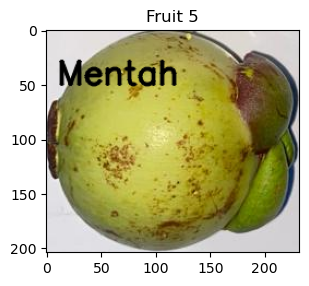

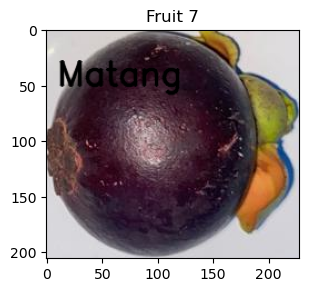

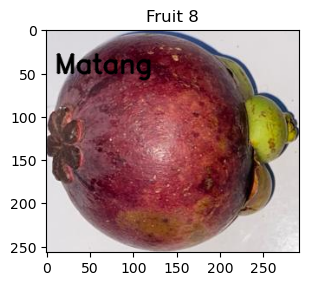

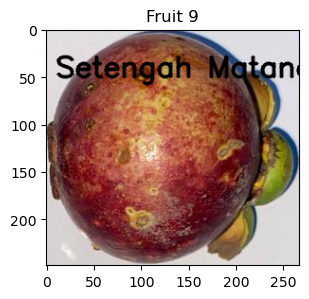

In [112]:
# Tampilkan hasil secara terpisah dengan ukuran buah manggis
for i, contour in enumerate(cnt):
    # Hitung luas kontur
    area = cv2.contourArea(contour)

    # Tentukan batasan ukuran buah manggis
    min_area = 500  # Sesuaikan dengan ukuran yang diinginkan

    if area > min_area:
        # Dapatkan kotak pembatas untuk setiap objek
        x, y, w, h = cv2.boundingRect(contour)

        # Potong dan tampilkan setiap objek
        fruit = imgg[y:y+h, x:x+w]
        # Tampilkan semua langkah dalam prosesnya
#         plt.figure(figsize=(15, 10))
#         plt.subplot(2, 4, 8), plt.imshow(fruit[:,:,[2,1,0]]), plt.title(f'Fruit {i + 1}')
#         plt.show()
        
        detect_maturity(fruit,i)
